<a href="https://colab.research.google.com/github/aakashpaul-2/Machine-Learning-Projects/blob/main/Simple%20ANN%20Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Guidance

This notebook is a template for module 4b and 4c, which will be tested in Google Colab, your code needs to run there.
The structure has been provided to improve consistency and make it easier for markers to understand your code but still give students the flexibility to be creative.  You need to populate the required functions to solve this problem.  All dependencies should be documented in the next cell.

You can:
    add further cells or text blocks to extend or further explain your solution
    add further functions

Dont:
    rename functions
   

In [ ]:
# Fixed dependencies - do not remove or change.
import pytest
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive/')

# Import your dependencies
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# Import data

def import_local_data(file_path):
    raw_df = pd.read_excel(file_path)
    return raw_df

In [ ]:
local_file_path = "/content/gdrive/My Drive/Colab_Notebooks/Challenges/breast-cancer.xls"

In [ ]:
# Dont change
raw_data = import_local_data(local_file_path)

### Conduct exploratory data analysis and explain your key findings - Examine the data, explain its key features and what they look like.  Highlight any fields that are anomalous.

In [ ]:
raw_data.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,2019-05-03 00:00:00,yes,2,left,right_up,no,recurrence-events


In [ ]:
# Analysing each column in detail

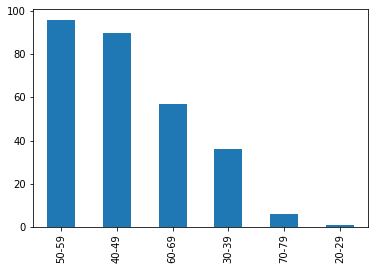

In [ ]:
raw_data['age'].value_counts().plot.bar()
# 6 different age groups found (i.e. 6 distinct values). Age group with the most data seems to be between 40-59
# Approach is to use dummy variables to represent each age group as more than 2 categories present

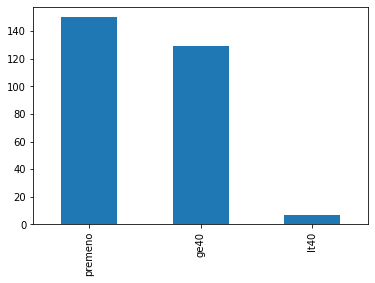

In [ ]:
raw_data['menopause'].value_counts().plot.bar()
# 3 different menopause categories found (i.e. 3 distinct values). Very few with lt40
# Approach is to use dummy variables to represent each menopause category as more than 2 categories present

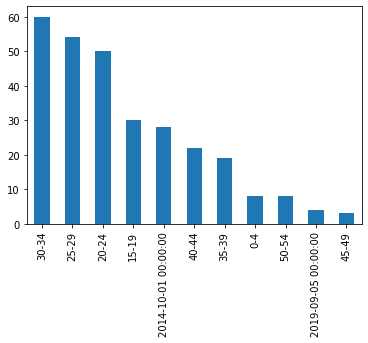

In [ ]:
raw_data['tumor-size'].value_counts().plot.bar()
# 9 different tumor-size categories found (i.e. 9 distinct values).
# two distinct datetime values with tumor-size values - errors within the dataset and needs to be cleaned
df_tumor_values = raw_data['tumor-size'].value_counts().index
df_tumor_values_timestamp_1 = df_tumor_values[4]
df_tumor_values_timestamp_2 = df_tumor_values[9]

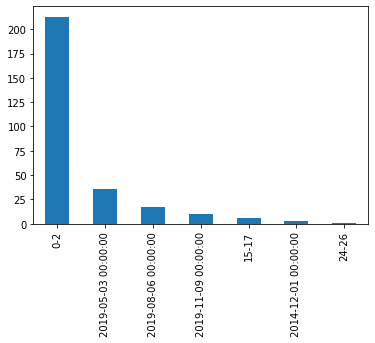

In [ ]:
raw_data['inv-nodes'].value_counts().plot.bar()
# several date values within this column
# majority of values are labelled 0-2 (small variance) - hence drop this column

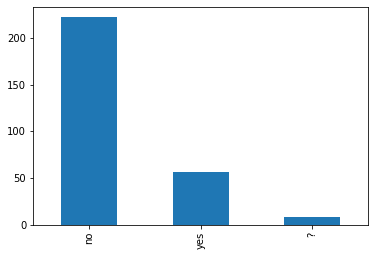

In [ ]:
raw_data['node-caps'].value_counts().plot.bar()
# 2 different node-caps categories found (i.e. 2 distinct values). Mostly no.
# Approach is to use Label Encoder to represent Yes/No category as only 2 categories are present.
# Some missing values that needs to be cleaned

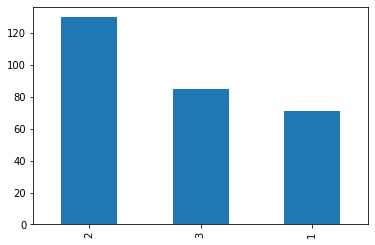

In [ ]:
raw_data['deg-malig'].value_counts().plot.bar()
# 3 different deg-malig categories found (i.e. 3 distinct values)

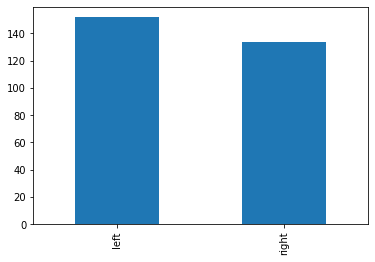

In [ ]:
raw_data['breast'].value_counts().plot.bar()
# 2 different deg-malig categories found (i.e. 2 distinct values)

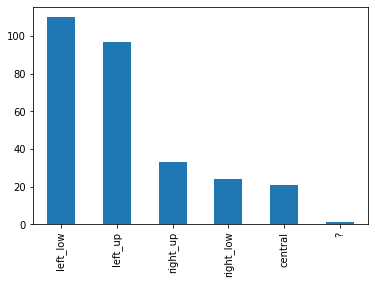

In [ ]:
raw_data['breast-quad'].value_counts().plot.bar()
# 5 different node-caps categories found (i.e. 5 distinct values)
# Some missing values that needs to be cleaned

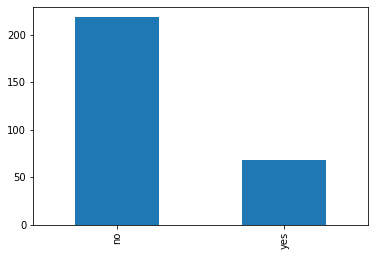

In [ ]:
raw_data['irradiat'].value_counts().plot.bar()
# 2 different deg-malig categories found (i.e. 2 distinct values)

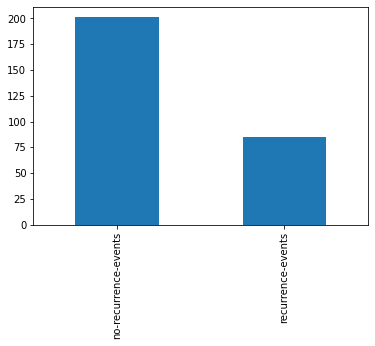

In [ ]:
raw_data['Class'].value_counts().plot.bar()
# 2 different deg-malig categories found (i.e. 2 distinct values)

Create any data pre-processing that you will conduct on seen and unseen data. Regardless of the model you use, this dataframe must contain only numeric features and have a strategy for any expected missing values. Any objects can that are needed to handle the test data that are dependent on the training data can be stored in the model class. You are recommended to use sklearn Pipelines or similar functionality to ensure reproducibility.

In [ ]:
# similat preprocessing steps as 4B applied for 4C

In [ ]:
def preprocessing_train(raw_data):

  raw_data = raw_data.drop(["inv-nodes"], axis = 1)
  # removing datetime objects from tumor-size
  raw_data = raw_data.drop(raw_data[(raw_data["tumor-size"] == df_tumor_values_timestamp_1) | (raw_data["tumor-size"] == df_tumor_values_timestamp_2) | (raw_data["node-caps"] == "?") | (raw_data['breast-quad'] == "?") ].index )
     
  # changing variables to catagorical values
  # defining the target variable y
  y = raw_data.iloc[:,-1]

  # changing target to catagorical variables using label encoder to obtain an array
  labelencoder = LabelEncoder()
  y = labelencoder.fit_transform(y)

  # changing variables to catagorical values for input variables
  X = raw_data.iloc[:,:8]

  # changing all input variables to catagorical values using pandas get dummies. First column for each input variable dropped to avoid dummy variable trap
  X = X.astype('category')
  X = pd.get_dummies(X, drop_first = True)

  X = X.reindex(sorted(X.columns), axis=1)

  return X, y

In [ ]:
def preprocessing_test(raw_data):
  
  raw_data = raw_data.drop(["inv-nodes"], axis = 1)
  # removing datetime objects from tumor-size
  raw_data = raw_data.drop(raw_data[(raw_data["tumor-size"] == df_tumor_values_timestamp_1) | (raw_data["tumor-size"] == df_tumor_values_timestamp_2) | (raw_data["node-caps"] == "?") | (raw_data['breast-quad'] == "?") ].index )
     
  # changing variables to catagorical values
  # defining the target variable y
  y = raw_data.iloc[:,-1]

  # changing target to catagorical variables using label encoder to obtain an array
  labelencoder = LabelEncoder()
  y = labelencoder.fit_transform(y)

  # changing variables to catagorical values for input variables
  X = raw_data.iloc[:,:8]

  # changing all input variables to catagorical values using pandas get dummies. First column for each input variable dropped to avoid dummy variable trap
  X = X.astype('category')
  X = pd.get_dummies(X, drop_first = True)

  # if columns are not the same size as the x_train columns - add these missing columns
  extra_col = []

  if X_train.shape[1] != X.shape[1]:
    for i in range((X_train.shape[1])):
      if X_train.columns[i] not in X.columns:
        extra_col.append(X_train.columns[i])
 
  if len(extra_col) != 0:
    for i in range(len(extra_col)):
      X[extra_col[i]] = 0

  # sorted to ensure consistent column format to train data
  X = X.reindex(sorted(X.columns), axis=1)

  return X, y

In [ ]:
# Populate preprocess_training_data and preprocess_test_data to preprocess data.
# You must process test and train separately so your model does not accidently gain information that a model wouldnt have in reality and therefore get better predictions

In [ ]:
class Module4_Model:
    
    def __init__(self):
        self.model = None
    
    def train_test_split(self,raw_data):
      train, test = train_test_split(raw_data, test_size = 0.25, random_state = 42)
      return train, test

    def preprocess_training_data(self, train):
      
      X_train, y_train = preprocessing_train(train)
      return X_train, y_train

    def preprocess_test_data(self, test):
      
      X_test, y_test = preprocessing_test(test)
      return  X_test, y_test

In [ ]:
# Dont change
my_model = Module4_Model()

In [ ]:
# Dont change
# data is split before the preprocessing steps are applied
train, test = my_model.train_test_split(raw_data)
# data preprocessing to get train values
X_train, y_train = my_model.preprocess_training_data(train)

In [ ]:
# Create a model

In [ ]:
# checking whether the model can run on the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
# number of inputs for the ANN model
n_inputs = X_train.shape[1]
print(n_inputs)

24


In [ ]:
# a simple model structure is defined where with 24 - 1 neuron in only one layer 
# sigmoid activation used as outcome is given a probability between 0 or 1 i.e. non-recurrence-event  < 0.5 or recurrence-event >= 0.5
model = nn.Sequential(
    nn.Linear(n_inputs, 1),
    nn.Sigmoid()
)
# assigning the model to the GPU
model.to(device)
# Binary cross entropy loss criterion used as output is 2 classes (0 and 1)
criterion = nn.BCELoss()
# adam optimzer used during back propagation for gradient descent
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
# converted to numpy to convert to tensors
X_train_tensor = X_train
X_train_tensor = X_train_tensor.to_numpy()


In [ ]:
# Convert train data into torch tensors
X_train_tensor = torch.from_numpy(X_train_tensor.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))

X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)


In [ ]:
# Train the model
n_epochs = 10000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(X_train_tensor)
  loss = criterion(outputs, y_train_tensor)
    
  # Backward and optimize
  loss.backward()
  optimizer.step()

  # Save losses
  train_losses[it] = loss.item()
      
  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}')


Epoch 50/10000, Train Loss: 0.6552
Epoch 100/10000, Train Loss: 0.6340
Epoch 150/10000, Train Loss: 0.6185
Epoch 200/10000, Train Loss: 0.6062
Epoch 250/10000, Train Loss: 0.5960
Epoch 300/10000, Train Loss: 0.5876
Epoch 350/10000, Train Loss: 0.5805
Epoch 400/10000, Train Loss: 0.5745
Epoch 450/10000, Train Loss: 0.5694
Epoch 500/10000, Train Loss: 0.5651
Epoch 550/10000, Train Loss: 0.5615
Epoch 600/10000, Train Loss: 0.5583
Epoch 650/10000, Train Loss: 0.5556
Epoch 700/10000, Train Loss: 0.5533
Epoch 750/10000, Train Loss: 0.5513
Epoch 800/10000, Train Loss: 0.5496
Epoch 850/10000, Train Loss: 0.5481
Epoch 900/10000, Train Loss: 0.5468
Epoch 950/10000, Train Loss: 0.5456
Epoch 1000/10000, Train Loss: 0.5446
Epoch 1050/10000, Train Loss: 0.5437
Epoch 1100/10000, Train Loss: 0.5429
Epoch 1150/10000, Train Loss: 0.5422
Epoch 1200/10000, Train Loss: 0.5416
Epoch 1250/10000, Train Loss: 0.5410
Epoch 1300/10000, Train Loss: 0.5405
Epoch 1350/10000, Train Loss: 0.5400
Epoch 1400/10000, Tra

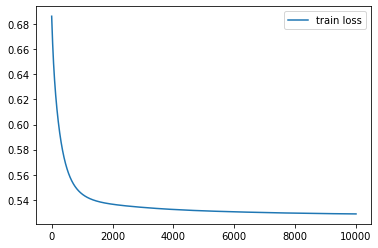

In [ ]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
#plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

# train loss decreases per epoch - suggests model is performing well 

In [ ]:
# test data
X_test, y_test = my_model.preprocess_test_data(test)

In [ ]:
# converting to tensors and moving to GPU
X_test_tensor = X_test
X_test_tensor = X_test_tensor.to_numpy()
X_test_tensor = torch.from_numpy(X_test_tensor.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))
X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

In [ ]:
# predictions
# converting to tensors for prediction and back to cpu for comparison
with torch.no_grad():
  y_pred = model(X_test_tensor)
  y_pred = y_pred.cpu()

  


In [ ]:
# values above 0.4 == TRUE i.e. recurrence-event for both prediction and test set
# threshold of 0.4 used consistent with task 4B
y_pred = y_pred  > 0.4

y_test = y_test  > 0.4


In [ ]:
cm_test = confusion_matrix(y_test,y_pred)

In [ ]:
# confusion matrix shows that false negative rates are high
cm_test

array([[37,  4],
       [12,  7]])

In [ ]:
report_nn = classification_report(y_test, y_pred)

In [ ]:
# classification report shows moderate accuracy of 73% with a f1-score of 47% for true values
print(report_nn)


              precision    recall  f1-score   support

       False       0.76      0.90      0.82        41
        True       0.64      0.37      0.47        19

    accuracy                           0.73        60
   macro avg       0.70      0.64      0.64        60
weighted avg       0.72      0.73      0.71        60



### Unit tests:

#### Checking training and test data for null values. This will work for both pd dataframes and np arrays, and ensures no null values exist.

In [ ]:
def test_no_nulls(data):
    """ Assert no null values within pd dataframe or np array """
    
    # if data is numpy array, handle accordingly
    if isinstance(data, (np.ndarray)):
        assert not np.isnan(np.min(data))
    
    # if not np array, assume data is pandas dataframe
    else:
        assert data.isna().sum().sum() == 0

In [ ]:
# run null data unit test on both training and test data
test_no_nulls(x_train_processed)
test_no_nulls(x_test_processed)